# Preprocessing
*Swopnil N. Shrestha (2020-04-28)*
<br><br>
Preprocessing the GTSRB dataset for AlexNet and LeNET CNN Training

In [54]:
# Base Python Modules
import os
import pickle                   # Pickle
import csv                      # For processing comma-separated-values
from PIL import Image           # Pillow Python imaging library
import math

In [55]:
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
from sklearn.utils import shuffle

## Loading the Data

In [56]:
training = './data/train.p'
validation = './data/valid.p'
testing = './data/test.p'
signname = './data/signnames.csv'

In [57]:
# Import into Python
with open(training, mode='rb') as f:
    train = pickle.load(f)
with open(validation, mode='rb') as f:
    valid = pickle.load(f)
with open(testing, mode='rb') as f:
    test = pickle.load(f)
with open(signname) as f:
    # Read without headers
    signnames = [val[1] for val in csv.reader(f)]

In [58]:
# View the signnames
signnames[:10]

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing']

In [59]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Exploratory Data Analysis (EDA)

In [60]:
n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = (X_train.shape[1], X_train.shape[2])
n_classes = len(signnames)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


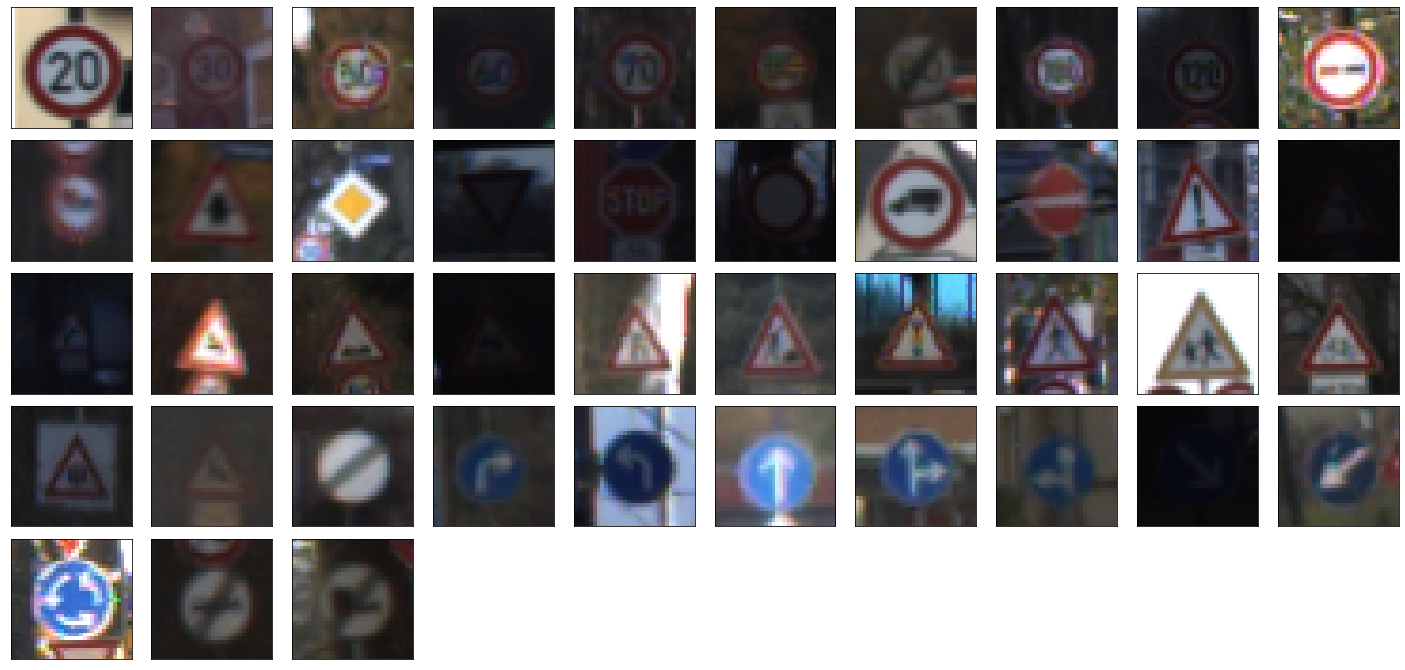

In [61]:
# Show one figure for each traffic sign
plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace = .1, wspace=.1)
for i in range(0, n_classes):
    index = np.where(y_train==i)[0][0]
    image = X_train[index]
    plt.subplot(5, 10, i + 1), plt.imshow(image)
    plt.xticks([]), plt.yticks([])
plt.show()

From the above image, we can see an overview of the images that we will be using to train the models. They are 25 x 25 pixel images with each pixel having a value between (0, 255)

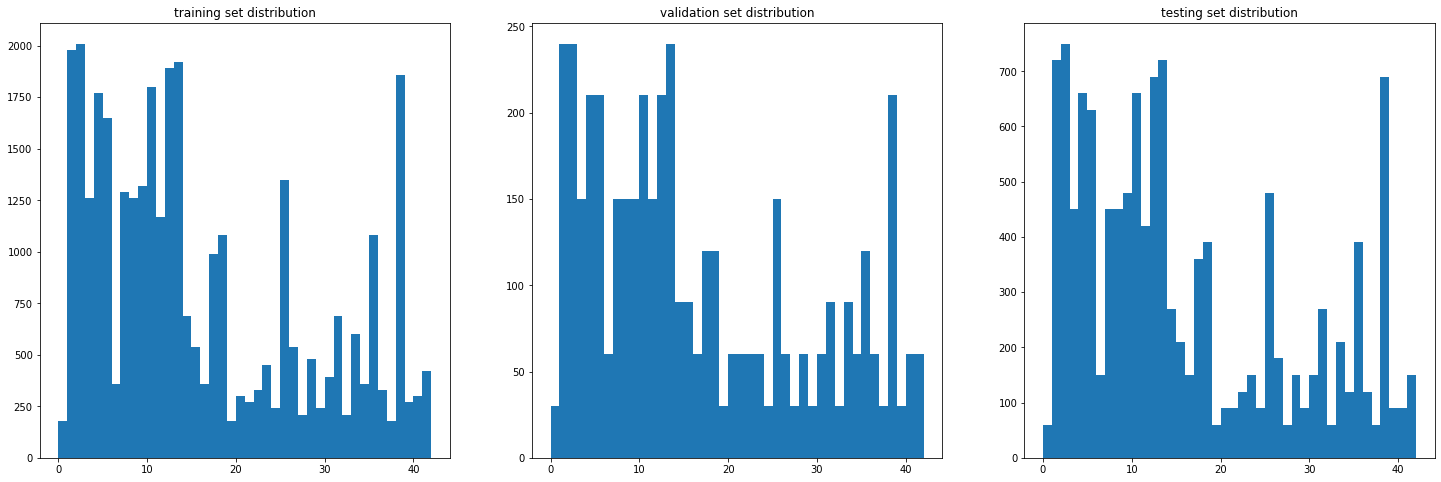

In [62]:
# Histogram of the number of each traffic sign

fig, axes = plt.subplots(1, 3 ,figsize=(25, 8))
axes[0].hist(y_train, bins=range(0, n_classes))
axes[0].set_title('training set distribution')
axes[1].hist(y_valid, bins=range(0, n_classes))
axes[1].set_title('validation set distribution')
axes[2].hist(y_test, bins=range(0, n_classes))
axes[2].set_title('testing set distribution')

plt.show()

## Data Pre-Processing
Normalization of the data

In [63]:

def normalize(image_set):
    return image_set.astype(np.float32) / 128. - 1.

# Convert the dataset to float

X_train =  normalize(X_train)
X_valid =  normalize(X_valid)
X_test =  normalize(X_test)

print(X_train.shape, X_train.dtype)
print(X_valid.shape, X_valid.dtype)
print(X_test.shape, X_test.dtype)

(34799, 32, 32, 3) float32
(4410, 32, 32, 3) float32
(12630, 32, 32, 3) float32


## Export Pre-Processed Dataset

In [68]:
pickle_file = 'data/pd.pickle'
if not os.path.isfile(pickle_file):
    with open(pickle_file, 'wb') as pfile:
        pickle.dump(
            {
                'train_features': X_train,
                'train_labels': y_train,
                'valid_features': X_valid,
                'valid_labels': y_valid,
                'test_features': X_test,
                'test_labels': y_test,
                'signnames': signnames,
            },
            pfile, protocol=2)